# Welcome to 2nd hands-on session!

## Brief outline:
- Filters
- Edge detection
- Morphological operations

$Note:$ The images for the exercises are given in the "images" folder!

## 1] Filters

$\textbf{Image Filtering:}$ Images can be filtered with various low-pass filters (LPF), high-pass filters (HPF), etc. LPF helps in removing noise, blurring images, etc. HPF filters help in finding edges in images.

$\textbf{Implementation:}$ Convolve a kernel with the image. OpenCV provides a function cv.filter2D() which performs convolution and replaces each pixel in the input image with the new pixel. 

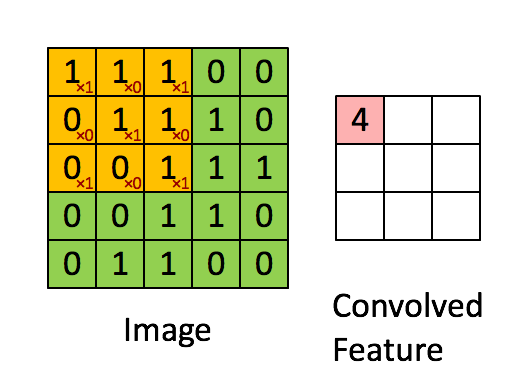

<font color=red>
Q1] Apply mean filter (average filter) to the image "penguins.jpg" and display the results.
</font>

$\textbf{Mean filter:}$ The mean filter, also known as average filter takes the average of all the pixels under the kernel area and replaces the central element. This is done by convolving an image with the normalized box filter. A $3 \times 3$ normalized box filter is given by:  

$
\begin{equation*}
K = \frac{1}{9}
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
\end{equation*}
$

$\textbf{Applications:}$ Mean filter blurs the image and thus is useful for removing noise. It removes the high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation.

#### Import all the necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Function to apply mean filter

In [2]:
def mean_filter(img, ksize):
    
    kernel = np.ones((ksize, ksize), np.float32) / (ksize*ksize)
    filtered_img = cv2.filter2D(img, -1, kernel)
    
    return filtered_img

#### Functon to plot the images

In [3]:
def plot_images(img1, img2, title1='Input image', title2='Filtered image'):
    
    f = plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.title(title1) 
    plt.xticks([]), plt.yticks([])
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    plt.imshow(img1)
    
    plt.subplot(122)
    plt.title(title2)
    plt.xticks([]), plt.yticks([])
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    plt.imshow(img2)
    
    plt.show()

#### Read the image, filter and display

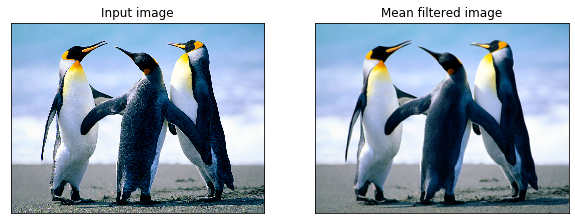

In [4]:
# Read the input image
image = cv2.imread('images/penguins.jpg')

# Define kernel size
ksize=5

# Filter the image
filtered_img = mean_filter(image, ksize)

# Plot the images
plot_images(image, filtered_img, title2='Mean filtered image')

In [ ]:
#### Try with different kernel sizes and also for diffrent images

<font color=red>
Q2] Apply median filter to the image "bird.png" and display the results.
</font>

$\textbf{Median filter:}$ Median filter takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Also, since it computes the median, the kernel size should always be a positive odd integer.

$\textbf{Hint:}$ Use the OpenCV function medianBlur(image, kernel_size)

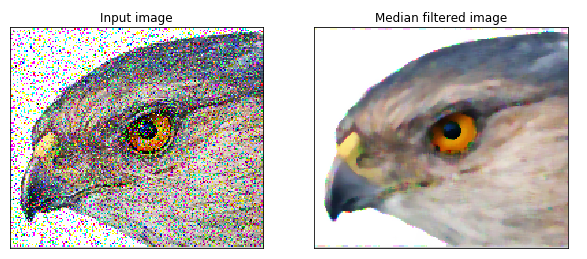

#### Function to apply median filter

In [ ]:
def median_filter(img, ksize):
    
    # Code to perform median filtering goes here
    
    return filtered_img

#### Read the image, filter and display

In [ ]:
# Read the input image

# Define the kernel size

# Filter the image by calling the median_filter()

# Plot the images

<font color=red>
Q3] Experiment with Gaussian filter on the image "cameraman.png" and display the results.
</font>

$\textbf{Gaussian filtering:}$ In this method, instead of a box filter, a Gaussian kernel is used. Gaussian blurring is highly effective in removing Gaussian noise from an image. 2D Gaussian can be represented as given in the equation below (a 3D image is shown below for visualization):

$
\begin{equation*}
G(x, y) = Ae^{\frac{-(x-\mu_x)^2}{2\sigma_x^2} + \frac{-(y-\mu_y)^2}{2\sigma_y^2}} 
\end{equation*}
$

Using the above formula, a $3 \times 3$ Gaussian kernel is given by:

$
\begin{equation*}
K = \frac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1 \\
\end{bmatrix}
\end{equation*}
$

$\textbf{Implementation:}$ It can be with the OpenCV function cv2.GaussianBlur(). We should specify the width and height of the kernel which should be positive and odd. We should also specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as the same as sigmaX. 

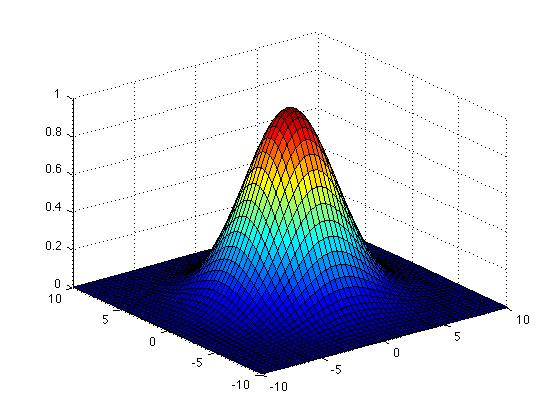

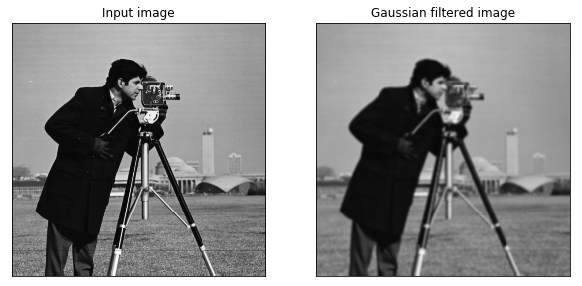

#### Function to perform Gaussian filtering

In [5]:
def gaussian_filter(img, ksize, std_dev):
    
    filtered_img = cv2.GaussianBlur(img, (ksize, ksize), std_dev)
    
    return filtered_img

#### Read the image, filter and display

In [ ]:
# Read the input image

# Define the kernel size and standard deviation

# Filter the image

# Plot the images

<font color=red>
Q4] Apply high-boost filtering on the image "fries.png" and display the results.
</font>

$\textbf{Highboost filtering:}$ High-boost filtering sharpens an image, i.e., performs edge enhancement using a smoothing filter. It consists of the following steps:
- $\textbf{Blur:}$ The first step is to blur an image. We know that by smoothing an image, we suppress most of the high-frequency components. 
- $\textbf{Mask:}$ Then, we subtract this smoothed image from the original image, the resulting difference is known as a mask. Thus, the output image will have most of the high-frequency components that are blocked by the smoothing filter. 

$$ m(x, y) = f(x, y) - f_b(x, y) $$

- $\textbf{Weighted addition:}$ Adding this mask with the original image will enhance the high-frequency components.

$$ g(x, y) = f(x, y) - k*m(x, y) $$

$\textbf{Note:}$ When $k=1$ it is known as Unsharp masking. For $k>1$, it is called as high-boost filtering because we are boosting the high-frequency components by giving more weight to the masked (edge) image.

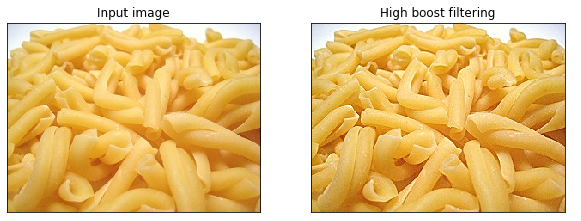

#### Function to implement high-boost filtering

In [ ]:
def high_boost_filtering(img, ksize, k):
    
    # Blur the image (Example: Gaussian Blur)
        
    # Perform hish-boost filtering
    filtered_img = cv2.addWeighted(img, k, blurred_img, -1, 0)
    
    return filtered_img

#### Read the image, filter and display

In [ ]:
# Read the input image

# Define the kernel size and standard deviation

# Filter the image by calling high_boost_filtering()

# Plot the images

In [ ]:
#### Experiment with different ksize and k

## Quiz!

<font color=red>
Image restoration: The image "degraded.jpg" has been degraded in some way. Find out what kind of degradation has been applied on the image and try to restore it. The original image before degradation is "clean.jpg". Clearly illustrate the steps taken to restore the image.
</font>

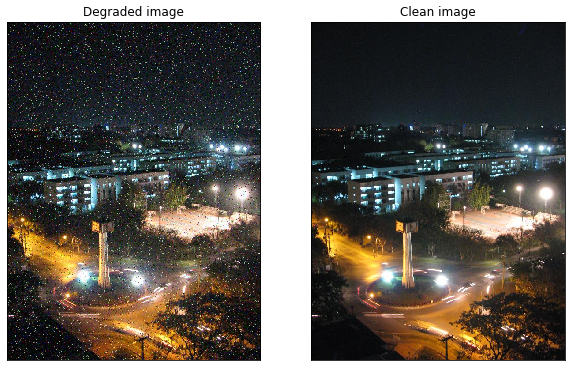

## 2] Edge Detection

<font color=red>
Q1] Detect the edges of the image "bell.jpg" using Canny edge detection algorithm.
</font>

$\textbf{Canny Edge Detection:}$ Canny edge detection is a popular edge detection algorithm with the following multiple stages:
- Noise reduction: 
    - Any noise present in the input image is removed using a $5 \times 5$ Gaussian filter to obtain a smooth image.
- Finding intensity gradient of the image
    - Edge gradient and direction for each intensity value in the image is computed using a Sobel kernel.
- Non-maximum suppression
    - Any unwanted pixels in the image are removed by scanning the entire image.
- Hysteresis thresholding
    - With the minimun and maximum threshold values, the edges are classified as edges and non-edges. Non-edges are discarded.

#### Function to detect the edges using Canny Edge Detector

In [5]:
def canny_edge_detetion(img, th1, th2):
    
    edges = cv2.Canny(img, th1, th2)
    
    return edges

#### Function to plot image and its edges

In [6]:
def plot_edges(img1, img2):
    
    f = plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.title('Input image') 
    plt.xticks([]), plt.yticks([])
    plt.imshow(img1)
    
    plt.subplot(122)
    plt.title('Edge detection')
    plt.xticks([]), plt.yticks([])
    plt.imshow(img2, cmap='gray')
    
    plt.show()

#### Read the input image, detect the edges using the canny edge detector and display the output

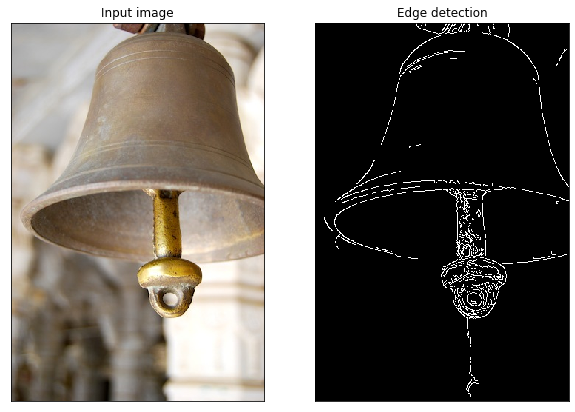

In [7]:
# Read the input image
image = cv2.imread('images/bell.jpg')

# Define the min and max threshold
th1 = 100
th2 = 200

# Apply canny edge detection
edges = canny_edge_detetion(image, th1, th2)

# Plot the images
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plot_edges(image, edges)

<font color=red>
Q2] Tweak the values of the arguments(minVal and maxVal), and report the values that give the best results for the images "bell.jpg" and "cubes.png". 
</font>

$\textbf{Hint:}$ For the bell image, try to detect as many edges in the bell as possible, while avoiding edges in the background.

#### Bell image

In [ ]:
# Read the input image
image = cv2.imread('images/bell.jpg')

# Define the min and max threshold

# Apply canny edge detection

# Plot the images

#### Cubes image

In [ ]:
# Read the input image
image = cv2.imread('images/cubes.png')

# Define the min and max threshold

# Apply canny edge detection

# Plot the images

<font color=red>
Q3] Compute the edges of the image "house.jpg" using sobel edge detection and display the edges in the horizontal and the vertical directions.
</font>

$\textbf{Sobel Operator:}$ Sobel edge detector is a gradient based method based on the first order derivatives. It calculates the first derivatives of the image separately for the X and Y axes. This operator uses two $3 \times 3$ kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical. The Sobel Kernels in x and y directions are given as:

$$
\begin{equation}
  \begin{bmatrix}
    -1 & 0 & +1 \\
    -2 & 0 & +2 \\
    -1 & 0 & +1 \\
  \end{bmatrix}
  \quad
  \begin{bmatrix}
    +1 & +2 & +1 \\
     0 &  0 &  0 \\
    -1 & -2 & -2 \\
  \end{bmatrix} 
\end{equation}
$$

#### Function to detect the edges using Sobel Operator

In [8]:
def sobel_edges(img, ksize):
    
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=ksize)  # x
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=ksize)  # y
        
    return sobelx, sobely

#### Function to plot the images

In [9]:
def plot_sobel_edges(img1, img2, img3):
    
    f = plt.figure(figsize = (15,18))
    plt.subplot(131)
    plt.title('Input image') 
    plt.xticks([]), plt.yticks([])
    plt.imshow(img1, cmap = 'gray')
    
    plt.subplot(132)
    plt.title('Sobel X')
    plt.xticks([]), plt.yticks([])
    plt.imshow(img2, cmap = 'gray')
    
    plt.subplot(133)
    plt.title('Sobel Y')
    plt.xticks([]), plt.yticks([])
    plt.imshow(img3, cmap = 'gray')
    
    plt.show()

#### Read the image, detect the edges and display

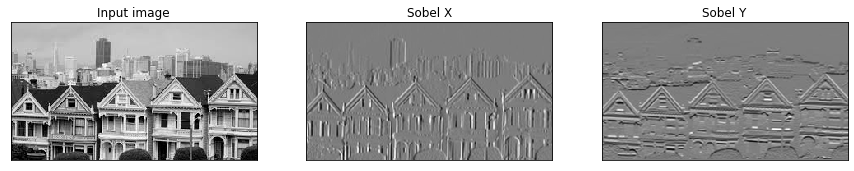

In [10]:
# Read the input image
image = cv2.imread('images/house.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define the kernel size
ksize=3

# Apply sobel edge detection
sobelx, sobely = sobel_edges(image, ksize)

# Plot the images
plot_sobel_edges(image, sobelx, sobely)

In [ ]:
#### Try with different kernel sizes and also for different images

<font color=red>
Q4] Detect the edges of the image "house.jpg" using Laplacian operator.
</font>

$\textbf{Laplacian edge detection:}$ Unlike the Sobel edge detector, the Laplacian edge detector uses only one kernel. It calculates second order derivatives in a single pass. A $3 \times 3$ Laplacian kernel is given as:

$$
\begin{equation*}
K = 
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
\end{equation*}
$$

#### Function to detect edges using Laplacian operator

In [11]:
def laplacian_edge_detection(img):
    
    edges = cv2.Laplacian(img, cv2.CV_64F)
    
    return edges

#### Function to plot the images

In [12]:
def plot_images(img1, img2, title1='Input image', title2='Output image'):
    
    f = plt.figure(figsize = (10,10))
    plt.subplot(121)
    plt.title(title1) 
    plt.xticks([]), plt.yticks([])
    plt.imshow(img1, cmap='gray')
    
    plt.subplot(122)
    plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.imshow(img2, cmap='gray')
    
    plt.show()

#### Read the image, detect edges and display

In [ ]:
# Read the input image
image = cv2.imread('images/house.jpg')

# Convert to gray-scale

# Apply laplacian edge detection

# Plot the images

## 3] Morphological Operations

$\textbf{Morphological Operations:}$ Morphological transformations are simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Other variants include Opening, Closing, Gradient etc also comes into play.

<font color=red>
Q1] Counting coins: Apply erosion to the image "coins.jpg" and display the result.
</font>

$\textbf{Erosion:}$ The basic idea of erosion is very similar to soil erosion, it erodes away the boundaries of foreground object. The kernel slides through the image (as in 2D convolution). A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel is 1, otherwise it is eroded (made to zero). Thus, all the pixels near boundary will be discarded depending upon the size of kernel. So the thickness or size of the foreground object decreases or simply white region decreases in the image. It is useful for removing small white noises, detach two connected objects etc.

#### Function to perform thresholding

In [13]:
def binary_thresholding(img):
    
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    
    return binary_img

#### Function to perform erosion

In [14]:
def erosion(img, ksize):
    
    kernel = np.ones((ksize, ksize), np.uint8)
    eroded_img = cv2.erode(img, kernel, iterations = 1)
    
    return eroded_img

#### Function to plot images

In [15]:
def plot_images(img1, img2, img3, title1='Input image', title2='Binary image', title3='Output image'):
    
    f = plt.figure(figsize = (15,18))
    plt.subplot(131)
    plt.title(title1) 
    plt.xticks([]), plt.yticks([])
    plt.imshow(img1, cmap = 'gray')
    
    plt.subplot(132)
    plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.imshow(img2, cmap = 'gray')
    
    plt.subplot(133)
    plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.imshow(img3, cmap = 'gray')
    
    plt.show()

#### Read the image, perform thresholding and erosion and display the output

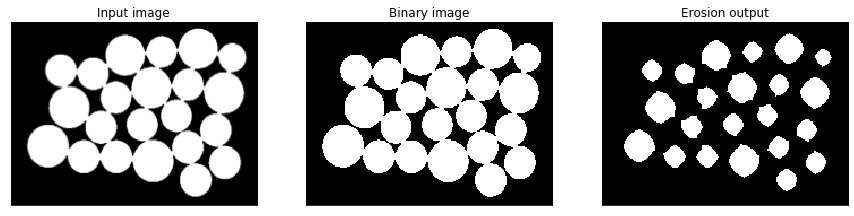

In [16]:
# Read the input image
image = cv2.imread('images/coins.png')

# Apply binary thresholding
binary_img = binary_thresholding(image)

# Perform erosion
ksize=9
eroded_img = erosion(binary_img, ksize)

# Plot the images
plot_images(image, binary_img, eroded_img, title3='Erosion output')

<font color=red>
Q2] Apply dilation to the image "amazon.png" and display the result.
</font>

$\textbf{Dilation:}$ It is just opposite of erosion. Here, a pixel element is '1' if atleast one pixel under the kernel is '1'. So it increases the white region in the image or size of foreground object increases. Normally, in cases like noise removal, erosion is followed by dilation. It is also useful in joining broken parts of an object. 

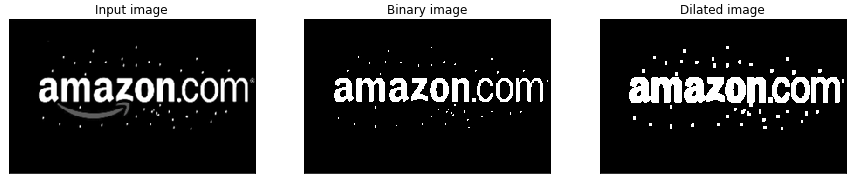

#### Function to perform dilation

In [ ]:
def dilation(img, ksize):
    
    # Define the kernel

    # Call cv2.dilate(img, kernel)
    
    return dilated_img

#### Read the image, perform thresholding and dilation and display the output

In [ ]:
# Read the input image
image = cv2.imread('images/amazon.png')

# Apply binary thresholding

# Perform dilation

# Plot the images

<font color=red>
Q3] Perform opening operation and display the results on "letter.png" image.
</font>

$\textbf{Opening:}$ Opening is the operation where erosion is followed by dilation. 

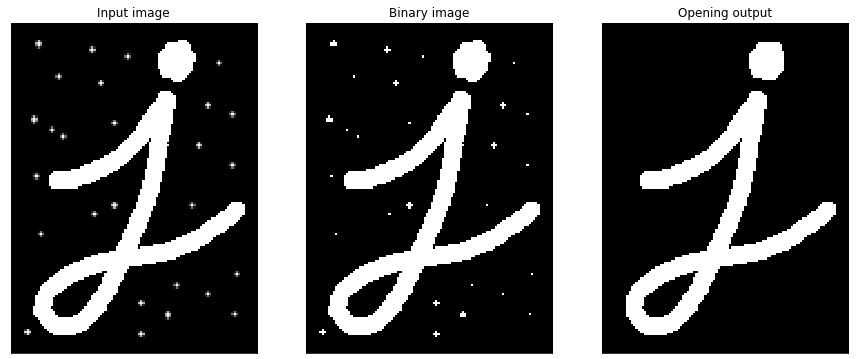

In [ ]:
# Read the input image
image = cv2.imread('images/letter.png')

# Apply binary thresholding

# Opening: Erosion -> Dilation
# Perform erosion

# Perform dilation

# Plot the images

### Another alternative: Use OpenCV function cv2.morphologyEx()

In [17]:
def opening(img, ksize):
    
    kernel = np.ones((ksize, ksize), np.uint8)
    opening_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    
    return opening_img

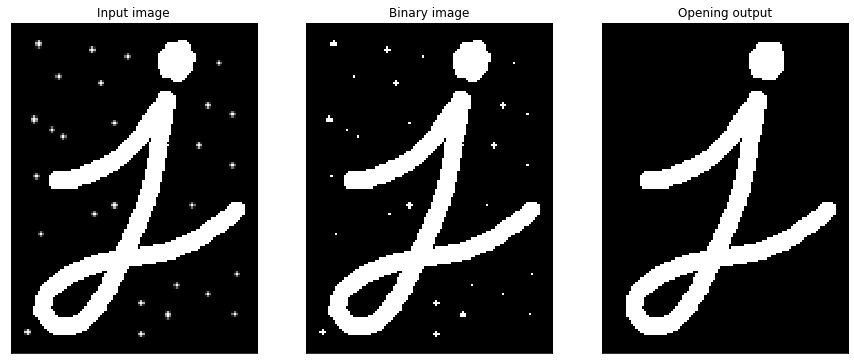

In [18]:
# Read the input image
image = cv2.imread('images/letter.png')

# Apply binary thresholding
binary_img = binary_thresholding(image)

# Perform opening
ksize=5
opening_img = opening(binary_img, ksize)

# Plot the images
plot_images(image, binary_img, opening_img, title3='Opening output')

<font color=red>
Q4] Perform closing operation and display the results on "circles.png" image.
</font>

$\textbf{Closing:}$ Closing is reverse of opening, i.e., dilation followed by erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object. 

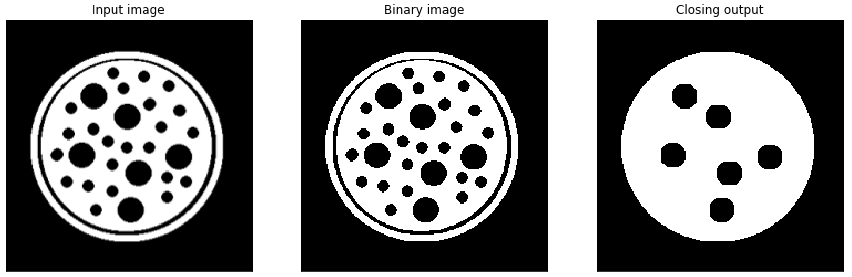

In [ ]:
def closing(img, ksize):
    
    # Define the kernel

    # Call the function cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    
    return closed_img

In [ ]:
# Read the input image
image = cv2.imread('images/circles.png')

# Apply binary thresholding

# Perform closing

# Plot the images